<a href="https://colab.research.google.com/github/alan-vieira/datascience/blob/main/Pre_processamento_de_Olimpiadas%2C_Vacinas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import altair as alt

In [2]:
atletas = pd.read_csv('https://raw.githubusercontent.com/rgriff23/Olympic_history/master/data/athlete_events.csv')

In [3]:
noc = pd.read_csv('https://raw.githubusercontent.com/rgriff23/Olympic_history/master/data/noc_regions.csv')

##Conhecendo a estrutura dos conjuntos de dados

In [4]:
atletas.head()

ID                      Name  ...                             Event  Medal
0   1                 A Dijiang  ...       Basketball Men's Basketball    NaN
1   2                  A Lamusi  ...      Judo Men's Extra-Lightweight    NaN
2   3       Gunnar Nielsen Aaby  ...           Football Men's Football    NaN
3   4      Edgar Lindenau Aabye  ...       Tug-Of-War Men's Tug-Of-War   Gold
4   5  Christine Jacoba Aaftink  ...  Speed Skating Women's 500 metres    NaN

[5 rows x 15 columns]

In [5]:
noc.head()

NOC       region                 notes
0  AFG  Afghanistan                   NaN
1  AHO      Curacao  Netherlands Antilles
2  ALB      Albania                   NaN
3  ALG      Algeria                   NaN
4  AND      Andorra                   NaN

## Verificando missing data

In [6]:
atletas.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [7]:
import missingno as msno

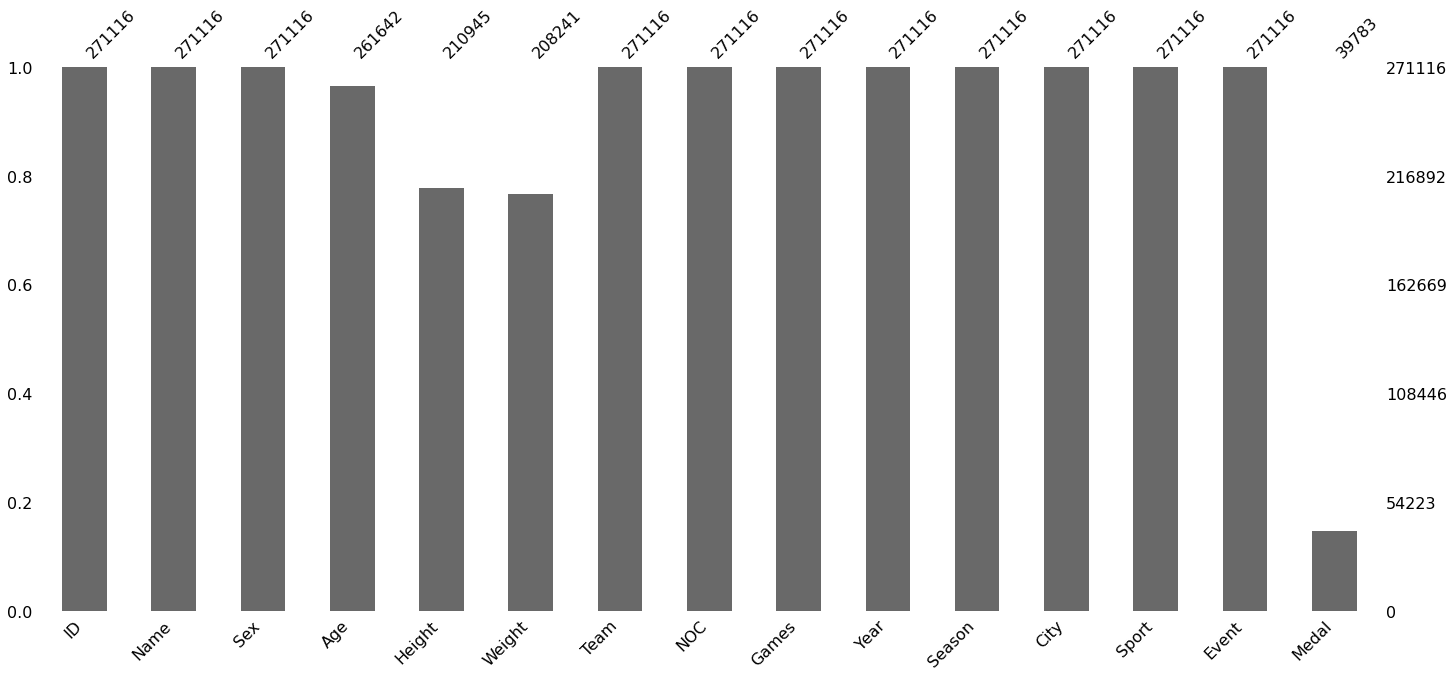

In [8]:
msno.bar(atletas)

##Estatísticas descritivas

In [9]:
atletas.describe()

ID            Age  ...         Weight           Year
count  271116.000000  261642.000000  ...  208241.000000  271116.000000
mean    68248.954396      25.556898  ...      70.702393    1978.378480
std     39022.286345       6.393561  ...      14.348020      29.877632
min         1.000000      10.000000  ...      25.000000    1896.000000
25%     34643.000000      21.000000  ...      60.000000    1960.000000
50%     68205.000000      24.000000  ...      70.000000    1988.000000
75%    102097.250000      28.000000  ...      79.000000    2002.000000
max    135571.000000      97.000000  ...     214.000000    2016.000000

[8 rows x 5 columns]

In [10]:
atletas[atletas['Age']==10]

ID  ...   Medal
142882  71691  ...  Bronze

[1 rows x 15 columns]

In [11]:
noc.describe()

NOC   region                  notes
count   230      227                     21
unique  230      206                     21
top     LTU  Germany  Serbia and Montenegro
freq      1        4                      1

In [12]:
rio2016 = atletas[atletas['Year'] == 2016]

In [13]:
rio2016.head()

ID               Name  ...                                    Event  Medal
80   22      Andreea Aanei  ...  Weightlifting Women's Super-Heavyweight    NaN
139  51  Nstor Abad Sanjun  ...   Gymnastics Men's Individual All-Around    NaN
140  51  Nstor Abad Sanjun  ...          Gymnastics Men's Floor Exercise    NaN
141  51  Nstor Abad Sanjun  ...           Gymnastics Men's Parallel Bars    NaN
142  51  Nstor Abad Sanjun  ...          Gymnastics Men's Horizontal Bar    NaN

[5 rows x 15 columns]

In [14]:
### quantas medalhas?

rio2016['Medal'].value_counts()

Bronze    703
Gold      665
Silver    655
Name: Medal, dtype: int64

In [15]:
### distribuição de medalhas por esporte

rio2016[rio2016['Medal'].notnull()].groupby(['NOC', 'Sport', 'Medal'])[['Event']].nunique()

Event
NOC Sport     Medal        
ALG Athletics Silver      2
ARG Hockey    Gold        1
    Judo      Gold        1
    Sailing   Gold        1
    Tennis    Silver      1
...                     ...
VEN Athletics Silver      1
    Boxing    Bronze      1
    Cycling   Bronze      1
VIE Shooting  Gold        1
              Silver      1

[620 rows x 1 columns]

In [16]:
medalhas = atletas.groupby(['NOC', 'Event', 'Medal']).nunique().index

É possível verificar que país ganhou cada medalha por evento?

In [17]:
medalhas = medalhas.to_frame()

In [18]:
medalhas.head()

NOC  ...   Medal
NOC Event                         Medal        ...        
AFG Taekwondo Men's Featherweight Bronze  AFG  ...  Bronze
    Taekwondo Men's Flyweight     Bronze  AFG  ...  Bronze
AHO Sailing Mixed Windsurfer      Silver  AHO  ...  Silver
ALG Athletics Men's 1,500 metres  Gold    ALG  ...    Gold
                                  Silver  ALG  ...  Silver

[5 rows x 3 columns]

In [19]:
medalhas = medalhas.reset_index(drop=True)

In [20]:
medalhas.head()

NOC                          Event   Medal
0  AFG  Taekwondo Men's Featherweight  Bronze
1  AFG      Taekwondo Men's Flyweight  Bronze
2  AHO       Sailing Mixed Windsurfer  Silver
3  ALG   Athletics Men's 1,500 metres    Gold
4  ALG   Athletics Men's 1,500 metres  Silver

In [21]:
medalhas.pivot_table(values='NOC', index='Event', columns='Medal', aggfunc='first')

Medal                                          Bronze Gold Silver
Event                                                            
Aeronautics Mixed Aeronautics                     NaN  SUI    NaN
Alpine Skiing Men's Combined                      AUT  AUT    AUT
Alpine Skiing Men's Downhill                      AUT  AUT    AUT
Alpine Skiing Men's Giant Slalom                  AUT  AUT    AUT
Alpine Skiing Men's Slalom                        AUT  AUT    AUT
...                                               ...  ...    ...
Wrestling Women's Flyweight, Freestyle            AZE  CAN    AZE
Wrestling Women's Heavyweight, Freestyle          CHN  CAN    BUL
Wrestling Women's Light-Heavyweight, Freestyle    KAZ  JPN    RUS
Wrestling Women's Lightweight, Freestyle          AZE  JPN    CAN
Wrestling Women's Middleweight, Freestyle         FRA  JPN    BLR

[756 rows x 3 columns]

#investigar os vencedores

In [22]:
gold = atletas[atletas['Medal'] == 'Gold'].copy()

In [23]:
gold.head()

ID                     Name  ...                             Event  Medal
3    4     Edgar Lindenau Aabye  ...       Tug-Of-War Men's Tug-Of-War   Gold
42  17  Paavo Johannes Aaltonen  ...  Gymnastics Men's Team All-Around   Gold
44  17  Paavo Johannes Aaltonen  ...      Gymnastics Men's Horse Vault   Gold
48  17  Paavo Johannes Aaltonen  ...  Gymnastics Men's Pommelled Horse   Gold
60  20       Kjetil Andr Aamodt  ...       Alpine Skiing Men's Super G   Gold

[5 rows x 15 columns]

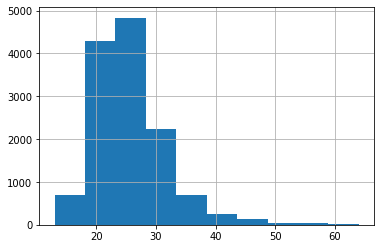

In [24]:
gold['Age'].hist()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


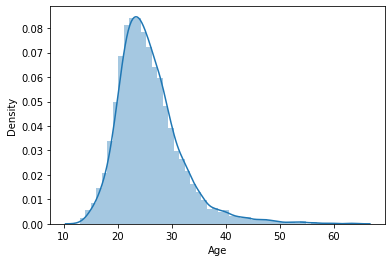

In [25]:
sns.distplot(gold['Age'], hist=True)

## Padronização da idade

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
sc = StandardScaler()

In [28]:
std_age = sc.fit_transform(gold[['Age']])

In [29]:
std_age

array([[ 1.37441854],
       [ 0.35620335],
       [ 0.35620335],
       ...,
       [ 0.52590588],
       [ 0.86531094],
       [-0.83171436]])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


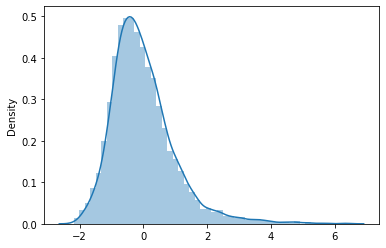

In [30]:
sns.distplot(std_age, hist=True)

## Tratamento de ruídos / discretização

In [31]:
gold['Age'].describe()

count    13224.000000
mean        25.901013
std          5.892887
min         13.000000
25%         22.000000
50%         25.000000
75%         29.000000
max         64.000000
Name: Age, dtype: float64

In [32]:
bins = pd.qcut(gold['Age'], 10)

In [33]:
grupos = gold['Age'].groupby(bins)

In [34]:
medias = grupos.mean()

In [35]:
new_age = bins.apply(lambda x : medias[x])

In [36]:
gold.loc[:, 'age_bin'] = new_age

In [37]:
gold.head()

ID                     Name  ... Medal    age_bin
3    4     Edgar Lindenau Aabye  ...  Gold  39.147611
42  17  Paavo Johannes Aaltonen  ...  Gold  27.481682
44  17  Paavo Johannes Aaltonen  ...  Gold  27.481682
48  17  Paavo Johannes Aaltonen  ...  Gold  27.481682
60  20       Kjetil Andr Aamodt  ...  Gold  18.548721

[5 rows x 16 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


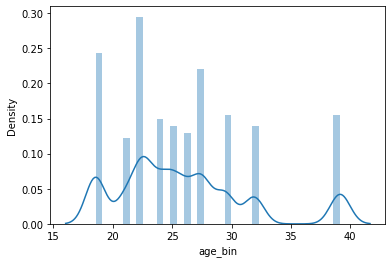

In [38]:
sns.distplot(gold['age_bin'], hist=True)

In [39]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [40]:
alt.Chart(gold).mark_bar().encode(
	x = 'Age',
	y = 'count()',
	tooltip = ['Age', 'Sex', 'count()'],
	color = alt.Color('Sex')
).interactive()

alt.Chart(...)

In [41]:
gold_50 = gold[gold['Age'] > 50]

In [42]:
gold_50['Sport'].value_counts()

Equestrianism       18
Sailing             12
Archery             11
Shooting            11
Art Competitions     8
Curling              2
Alpinism             1
Croquet              1
Roque                1
Name: Sport, dtype: int64

In [43]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Gold Medals > 50 years')

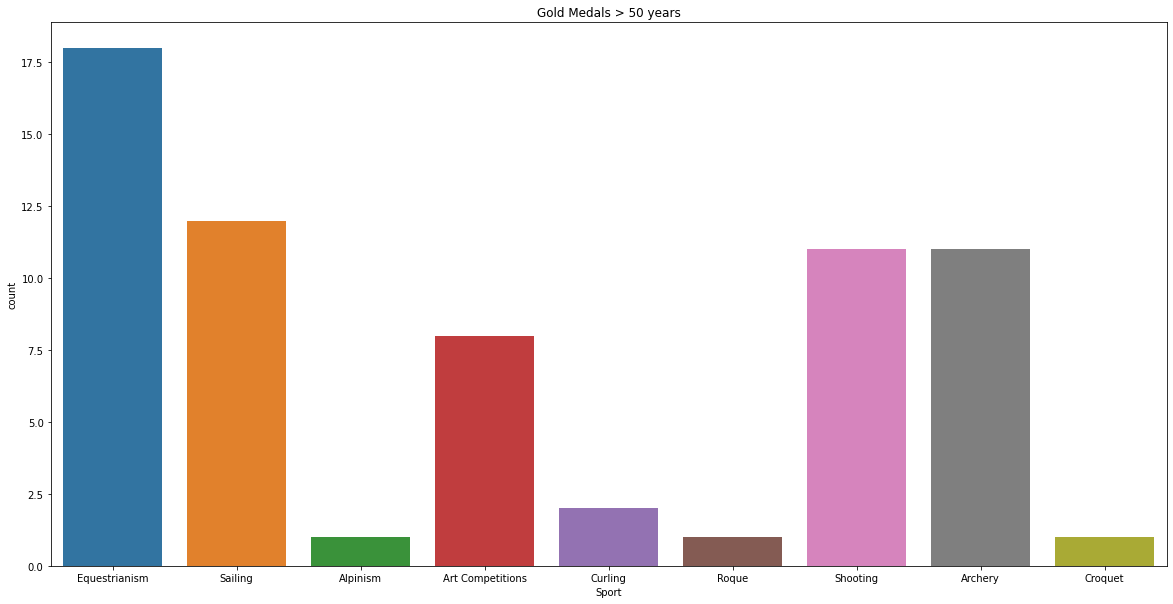

In [44]:
plt.figure(figsize=(20,10))
plt.tight_layout()
sns.countplot(gold_50['Sport'])
plt.title('Gold Medals > 50 years')

# Vacinas

In [45]:
excel_incidence = pd.read_excel('http://bit.ly/ds_vacina_incidence', sheet_name=None)

In [46]:
excel_incidence.keys()

dict_keys(['Readme Incidence', 'CRS', 'Diphtheria', 'JapEnc', 'Measles', 'Mumps', 'Ntetanus', 'Pertussis', 'Polio', 'Rubella', 'Ttetanus', 'Yfever', 'Reg_&_Global_Incidence'])

In [47]:
sheets = ['CRS', 'Diphtheria', 'JapEnc', 'Measles', 'Mumps', 'Ntetanus', 'Pertussis', 'Polio', 'Rubella', 'Ttetanus', 'Yfever']

##Concatenação

In [48]:
df = pd.concat(pd.read_excel('http://bit.ly/ds_vacina_incidence', sheet_name=sheets), ignore_index=True)

In [49]:
df.head()

WHO_REGION ISO_code        Cname Disease  2018  ...  1984  1983  1982  1981  1980
0        EMR      AFG  Afghanistan     CRS   NaN  ...   NaN   NaN   NaN   NaN   NaN
1        EUR      ALB      Albania     CRS   0.0  ...   NaN   NaN   NaN   NaN   NaN
2        AFR      DZA      Algeria     CRS   NaN  ...   NaN   NaN   NaN   NaN   NaN
3        EUR      AND      Andorra     CRS   0.0  ...   NaN   NaN   NaN   NaN   NaN
4        AFR      AGO       Angola     CRS   NaN  ...   NaN   NaN   NaN   NaN   NaN

[5 rows x 43 columns]

In [50]:
df['Disease'].value_counts()

yfever        194
ntetanus      194
pertussis     194
diphtheria    194
Mumps         194
Rubella       194
measles       194
ttetanus      194
JapEnc        194
polio         194
CRS           194
Name: Disease, dtype: int64

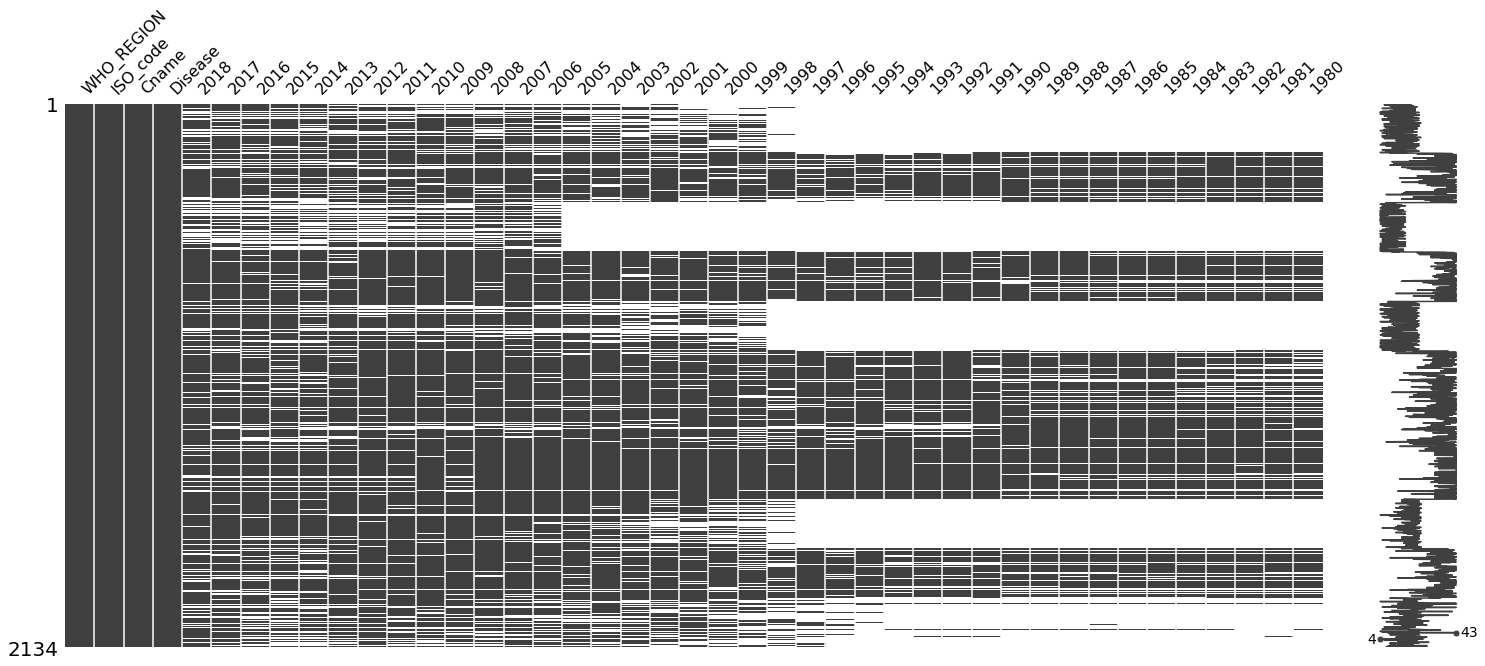

In [51]:
msno.matrix(df)

In [52]:
sarampo = df[df['Disease'] == 'measles']

In [53]:
sarampo.head()

WHO_REGION ISO_code        Cname  ...     1982     1981     1980
582        EMR      AFG  Afghanistan  ...  20320.0  31107.0  32455.0
583        EUR      ALB      Albania  ...      3.0      NaN      NaN
584        AFR      DZA      Algeria  ...  29584.0  20849.0  15527.0
585        EUR      AND      Andorra  ...      NaN      NaN      NaN
586        AFR      AGO       Angola  ...  30067.0  19714.0  29656.0

[5 rows x 43 columns]

In [54]:
sarampo_tidy = pd.melt(sarampo,
		                   id_vars = ['WHO_REGION', 'ISO_code', 'Cname', 'Disease'],
                       var_name = 'Ano',
                       value_name = 'Qtd')

In [55]:
sarampo_tidy.head()

WHO_REGION ISO_code        Cname  Disease   Ano     Qtd
0        EMR      AFG  Afghanistan  measles  2018  2012.0
1        EUR      ALB      Albania  measles  2018  1469.0
2        AFR      DZA      Algeria  measles  2018  3356.0
3        EUR      AND      Andorra  measles  2018     0.0
4        AFR      AGO       Angola  measles  2018    57.0

In [56]:
total_sarampo = sarampo_tidy.groupby('Ano').sum()

In [57]:
total_sarampo.head()

Qtd
Ano            
1980  3852242.0
1981  4078455.0
1982  3623758.0
1983  3586101.0
1984  3026973.0

In [58]:
total_sarampo = total_sarampo.reset_index()

In [59]:
total_sarampo.head()

Ano        Qtd
0  1980  3852242.0
1  1981  4078455.0
2  1982  3623758.0
3  1983  3586101.0
4  1984  3026973.0

In [60]:
alt.Chart(total_sarampo).mark_circle(color='rebeccapurple').encode(
    x = 'Ano',
    y = 'Qtd',
    size = 'Qtd'
)

alt.Chart(...)

In [61]:
todas_tidy = pd.melt(df,
                     ['WHO_REGION', 'ISO_code', 'Cname', 'Disease'],
                     var_name = 'Ano',
                     value_name = 'Qtd')

In [62]:
totais_ano = todas_tidy.groupby(['Disease', 'Ano']).agg({'Qtd':'sum'})

In [63]:
totais_ano = totais_ano.reset_index()

In [64]:
totais_ano.head()

Disease   Ano  Qtd
0     CRS  1980  0.0
1     CRS  1981  0.0
2     CRS  1982  0.0
3     CRS  1983  0.0
4     CRS  1984  0.0

In [65]:
alt.Chart(totais_ano).mark_circle().encode(
    x = 'Disease',
    y = 'Ano',
    tooltip = ['Disease', 'Qtd', 'Ano'],
    size = alt.Size('Qtd', scale=alt.Scale(range=[5,8000]), legend=None),
    color = alt.Color('Disease')

).configure_mark(opacity=0.5).properties(width=600).interactive()

alt.Chart(...)